# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from sklearn import datasets

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [4]:

url = 'http://api.openweathermap.org/data/2.5/weather?'

units= 'imperial'

query_url = f'{url}appid={weather_api_key}&units={units}&q='
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=fa0bf9afccb6a33bf50eecf85c16042a&units=imperial&q=


## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

In [6]:
cities

['saint anthony',
 'atuona',
 'stornoway',
 'hilo',
 'punta arenas',
 'nizhneyansk',
 'rikitea',
 'mataura',
 'morondava',
 'ayagoz',
 'lipetsk',
 'bairiki',
 'hobart',
 'high rock',
 'cherskiy',
 'kodiak',
 'longhua',
 'bredasdorp',
 'san quintin',
 'hermanus',
 'carauari',
 'benguela',
 'touros',
 'bakel',
 'camacha',
 'takapau',
 'vanavara',
 'sentyabrskiy',
 'panzhihua',
 'burgersdorp',
 'jiexiu',
 'ancud',
 'rio gallegos',
 'ostrovnoy',
 'paradwip',
 'baiquan',
 'new norfolk',
 'ushuaia',
 'busselton',
 'dikson',
 'candolim',
 'margate',
 'georgetown',
 'kapaa',
 'isangel',
 'clyde river',
 'cabo san lucas',
 'labytnangi',
 'haines junction',
 'puerto ayora',
 'flinders',
 'naustdal',
 'taolanaro',
 'hachinohe',
 'oranjemund',
 'kaduqli',
 'leningradskiy',
 'guerrero negro',
 'borovoy',
 'rio grande',
 'vaini',
 'barrow',
 'bonthe',
 'tsihombe',
 'alugan',
 'nurota',
 'cape town',
 'avarua',
 'bluff',
 'coos bay',
 'nabire',
 'tarko-sale',
 'saskylakh',
 'kieta',
 'tuktoyaktuk',
 

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
cities_list = cities
#series of empty lists

idnum = []
#[id]
name = []
#[name]
lat = []
#[coord][lat]
lon = []
#[coord][lon]
temp = []
#[main][temp]
humidity = []
#[main][humidity]
wind_speed = []
#[wind][speed]
clouds = []
#[clouds][all]
dt =[]
country = []
maxtemp = []

#1
print('Beginning of Data Retrieval')
print('-----------------------------')


#request info from api
for city in cities[0:25]:
    
    response = requests.get(query_url + city).json()
    #i = i+1
    try:
        #all lists that i want to run
        name.append(response['name'])
        idnum.append(response['id'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        clouds.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        maxtemp.append(response['main']['temp_max'])
        dt.append(response['dt'])
        print(f'{response["name"]}, {response["id"]} is being processed')    
    
    except(KeyError, IndexError):
        print(response)
        #code for if it breaks
        #name.append(city)
        #idnum.append(None)
        #lat.append(None)
        #lon.append(None)
        #temp.append(None)
        #humidity.append(None)
        #wind_speed.append(None)
        #clouds.append(None)
        #country.append(None)
        #maxtemp.append(None)
        #dt.append(None)
        #do for other variable s
        print (f'{city} not working')
       

    
#2
    
    #response = requests.get(url).json
        

Beginning of Data Retrieval
-----------------------------
Saint Anthony, 5044290 is being processed
Atuona, 4020109 is being processed
Stornoway, 2636790 is being processed
Hilo, 5855927 is being processed
Punta Arenas, 3874787 is being processed
{'cod': '404', 'message': 'city not found'}
nizhneyansk not working
Rikitea, 4030556 is being processed
Mataura, 6201424 is being processed
Morondava, 1058381 is being processed
Ayagoz, 1525988 is being processed
Lipetsk, 535121 is being processed
Bairiki Village, 7601762 is being processed
Hobart, 2163355 is being processed
High Rock, 3572189 is being processed
Cherskiy, 2126199 is being processed
Saint Paul Harbor, 5866583 is being processed
Longhua, 1802618 is being processed
Bredasdorp, 1015776 is being processed
San Quintín, 3984997 is being processed
Hermanus, 3366880 is being processed
Carauari, 3664659 is being processed
Benguela, 3351663 is being processed
Touros, 3386213 is being processed
Bakel, 2252606 is being processed
Camacha, 2

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
weather_dict ={
    'City' : name,
    'Cloudiness': clouds,
    'Country': country,
    'Date': dt,
    'Temperature': temp,
    'Humidity': humidity,
    'Lat': lat,
    'Lng': lon,
    'Max Temp': maxtemp,
    'Wind Speed': wind_speed
}
for key in weather_dict:
    print(key)
    print (weather_dict[key])
    #print(weather_dict)


weather_data_df = pd.DataFrame(weather_dict)
weather_data_df.head(25)

City
['Saint Anthony', 'Atuona', 'Stornoway', 'Hilo', 'Punta Arenas', 'Rikitea', 'Mataura', 'Morondava', 'Ayagoz', 'Lipetsk', 'Bairiki Village', 'Hobart', 'High Rock', 'Cherskiy', 'Saint Paul Harbor', 'Longhua', 'Bredasdorp', 'San Quintín', 'Hermanus', 'Carauari', 'Benguela', 'Touros', 'Bakel', 'Camacha']
Cloudiness
[75, 58, 29, 90, 20, 42, 0, 76, 4, 90, 75, 75, 20, 82, 1, 99, 71, 5, 9, 100, 18, 40, 0, 20]
Country
['US', 'PF', 'GB', 'US', 'CL', 'PF', 'NZ', 'MG', 'KZ', 'RU', 'KI', 'AU', 'BS', 'RU', 'US', 'CN', 'ZA', 'MX', 'ZA', 'BR', 'AO', 'BR', 'SN', 'PT']
Date
[1583369547, 1583369548, 1583369548, 1583369543, 1583369545, 1583369548, 1583369548, 1583369548, 1583369548, 1583369549, 1583369549, 1583369549, 1583369549, 1583369549, 1583369549, 1583369549, 1583369549, 1583369550, 1583369550, 1583369550, 1583369550, 1583369550, 1583369550, 1583369550]
Temperature
[36.57, 81.3, 33.89, 71.98, 57.11, 77.63, 61.32, 78.62, 9.46, 33.8, 87.8, 61.56, 77, 7.86, 19.4, 56.57, 64.36, 62.2, 62.91, 73.58, 

,City,Cloudiness,Country,Date,Temperature,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Saint Anthony,75,US,1583369547,36.57,59,45.02,-93.22,37.99,8.05
1,Atuona,58,PF,1583369548,81.30,69,-9.80,-139.03,81.30,10.22
2,Stornoway,29,GB,1583369548,33.89,81,58.21,-6.39,34.00,4.70
3,Hilo,90,US,1583369543,71.98,69,19.73,-155.09,78.80,16.11
4,Punta Arenas,20,CL,1583369545,57.11,71,-53.15,-70.92,57.20,9.17
5,Rikitea,42,PF,1583369548,77.63,72,-23.12,-134.97,77.63,17.00
6,Mataura,0,NZ,1583369548,61.32,54,-46.19,168.86,61.32,1.72
7,Morondava,76,MG,1583369548,78.62,66,-20.28,44.28,78.62,5.79
8,Ayagoz,4,KZ,1583369548,9.46,54,47.97,80.44,9.46,3.87
9,Lipetsk,90,RU,1583369549,33.80,100,52.60,39.57,33.80,11.18


In [9]:
#weather_data_df.dropna

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

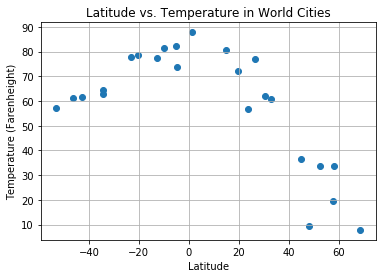

In [10]:
plt.scatter(weather_data_df["Lat"], weather_data_df["Temperature"], marker="o")

plt.title("Latitude vs. Temperature in World Cities")
plt.ylabel("Temperature (Farenheight)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("TemperatureInWorldCities.png")

plt.show()

#### Latitude vs. Humidity Plot

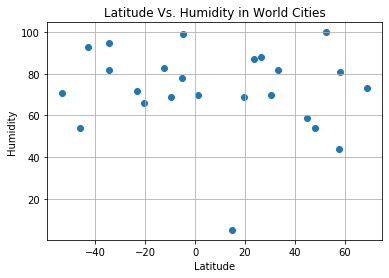

In [11]:
plt.scatter(weather_data_df["Lat"], weather_data_df["Humidity"], marker="o")

plt.title("Latitude Vs. Humidity in World Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("TemperatureInWorldCities.png")

plt.show()

#### Latitude vs. Cloudiness Plot

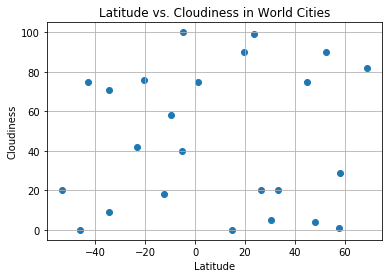

In [12]:
plt.scatter(weather_data_df["Lat"], weather_data_df["Cloudiness"], marker="o")

plt.title("Latitude vs. Cloudiness in World Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("TemperatureInWorldCities.png")
plt.show()

#### Latitude vs. Wind Speed Plot

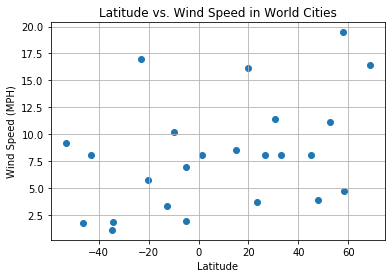

In [13]:
plt.scatter(weather_data_df["Lat"], weather_data_df["Wind Speed"], marker="o")

plt.title("Latitude vs. Wind Speed in World Cities")
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("TemperatureInWorldCities.png")

plt.show()

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots


In [15]:
# Create Northern and Southern Hemisphere DataFrames

#boston_data = datasets.load_boston()
#housing_data = pd.DataFrame(data=boston_data.data,columns=boston_data.feature_names)
#housing_data['MEDV'] = boston_data.target
#housing_data.head()

northern_df = weather_data_df.loc[weather_data_df['Lat'] > 0]
northern_df.head(25)
#southern_df = weather_data_df.loc

#weather_data_df['Lat'] > 0

,City,Cloudiness,Country,Date,Temperature,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Saint Anthony,75,US,1583369547,36.57,59,45.02,-93.22,37.99,8.05
2,Stornoway,29,GB,1583369548,33.89,81,58.21,-6.39,34.00,4.70
3,Hilo,90,US,1583369543,71.98,69,19.73,-155.09,78.80,16.11
8,Ayagoz,4,KZ,1583369548,9.46,54,47.97,80.44,9.46,3.87
9,Lipetsk,90,RU,1583369549,33.80,100,52.60,39.57,33.80,11.18
10,Bairiki Village,75,KI,1583369549,87.80,70,1.33,172.98,87.80,8.05
12,High Rock,20,BS,1583369549,77.00,88,26.62,-78.28,77.00,8.05
13,Cherskiy,82,RU,1583369549,7.86,73,68.75,161.30,7.86,16.40
14,Saint Paul Harbor,1,US,1583369549,19.40,44,57.79,-152.41,19.40,19.46
15,Longhua,99,CN,1583369549,56.57,87,23.61,114.19,56.57,3.69


In [16]:
southern_df= weather_data_df.loc[weather_data_df['Lat'] < 0]
southern_df

,City,Cloudiness,Country,Date,Temperature,Humidity,Lat,Lng,Max Temp,Wind Speed
1,Atuona,58,PF,1583369548,81.30,69,-9.80,-139.03,81.30,10.22
4,Punta Arenas,20,CL,1583369545,57.11,71,-53.15,-70.92,57.20,9.17
5,Rikitea,42,PF,1583369548,77.63,72,-23.12,-134.97,77.63,17.00
6,Mataura,0,NZ,1583369548,61.32,54,-46.19,168.86,61.32,1.72
7,Morondava,76,MG,1583369548,78.62,66,-20.28,44.28,78.62,5.79
11,Hobart,75,AU,1583369549,61.56,93,-42.88,147.33,62.60,8.05
16,Bredasdorp,71,ZA,1583369549,64.36,82,-34.53,20.04,66.20,1.12
18,Hermanus,9,ZA,1583369550,62.91,95,-34.42,19.23,64.00,1.88
19,Carauari,100,BR,1583369550,73.58,99,-4.88,-66.90,73.58,1.95
20,Benguela,18,AO,1583369550,77.54,83,-12.58,13.41,77.54,3.29



####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

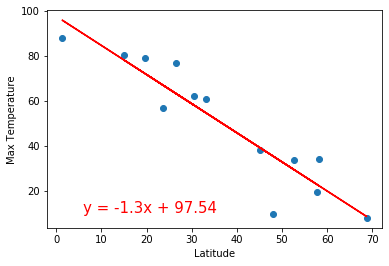

In [17]:
x_values = northern_df['Lat']
y_values = northern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

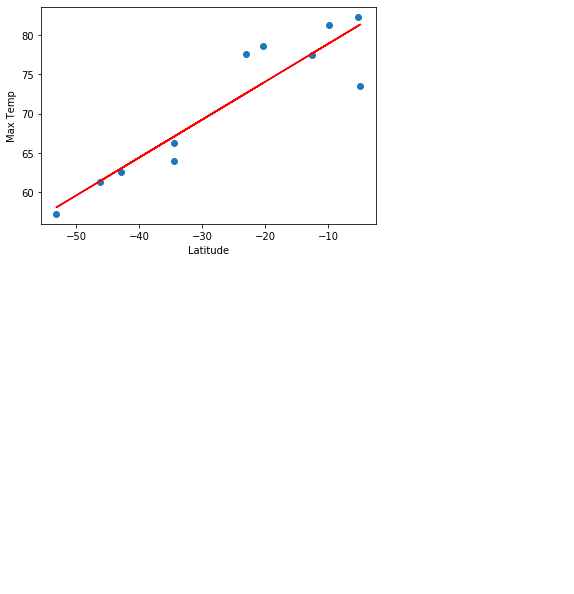

In [18]:
x_values = southern_df['Lat']
y_values = southern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

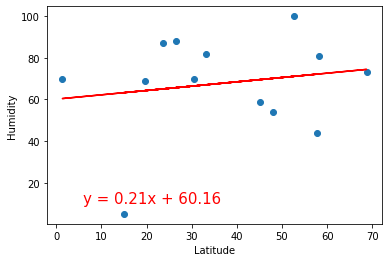

In [19]:
x_values = northern_df['Lat']
y_values = northern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

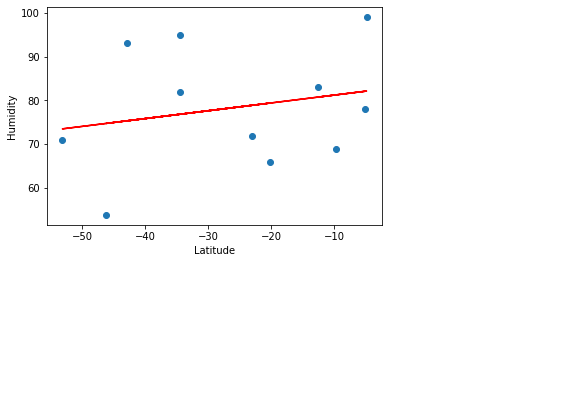

In [20]:
x_values = southern_df['Lat']
y_values = southern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

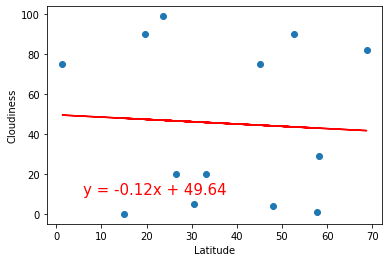

In [21]:
x_values = northern_df['Lat']
y_values = northern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

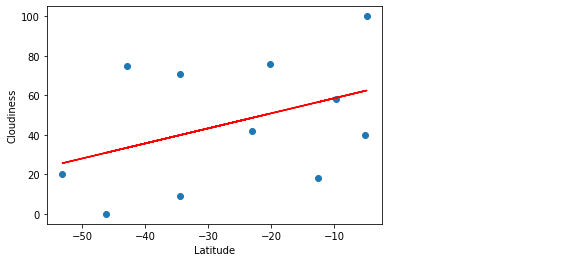

In [22]:
x_values = southern_df['Lat']
y_values = southern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

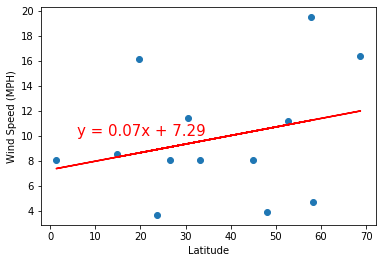

In [23]:
x_values = northern_df['Lat']
y_values = northern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [24]:
x_values = #['#']
y_values = #['#']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('#')
plt.ylabel('#')
plt.show()

SyntaxError: invalid syntax (<ipython-input-24-65eb679b1731>, line 1)

In [27]:
weather_data_df.to_csv("weatherData.csv", index=False, header=True)